59      100.583
329     120.568
354     113.085
489     129.157
769      46.469
854      68.726
914      73.749
1029    112.686
1204     78.337
1264     79.432
1759    113.357
1884    132.990
2124    141.649
2514    103.426
3184    117.933
3429    125.929
3829     77.595
4609     77.170
4859     79.723
4984    105.986
5684     84.803
5919    105.070
6149     99.403
6789     94.394
7479    138.129
7539     90.923
7649    140.512
Name: value, dtype: float64
55      17.478614
325     13.256460
350     12.958454
485     46.138325
765     13.428567
850     13.515211
910      9.853726
1025    16.951620
1200    14.842063
1260    33.303399
1755    22.156245
1880    22.335155
2120    43.609538
2510    14.836782
3180    15.168379
3425    22.693442
3825    27.229641
4605    54.366550
4855    35.558670
4980    14.715475
5680    22.167085
5915    22.383452
6145    10.643443
6785    15.412032
7475    33.209653
7535    12.864579
7645    30.414634
Name: value, dtype: float64
[('HG03683', 60.305367, 42

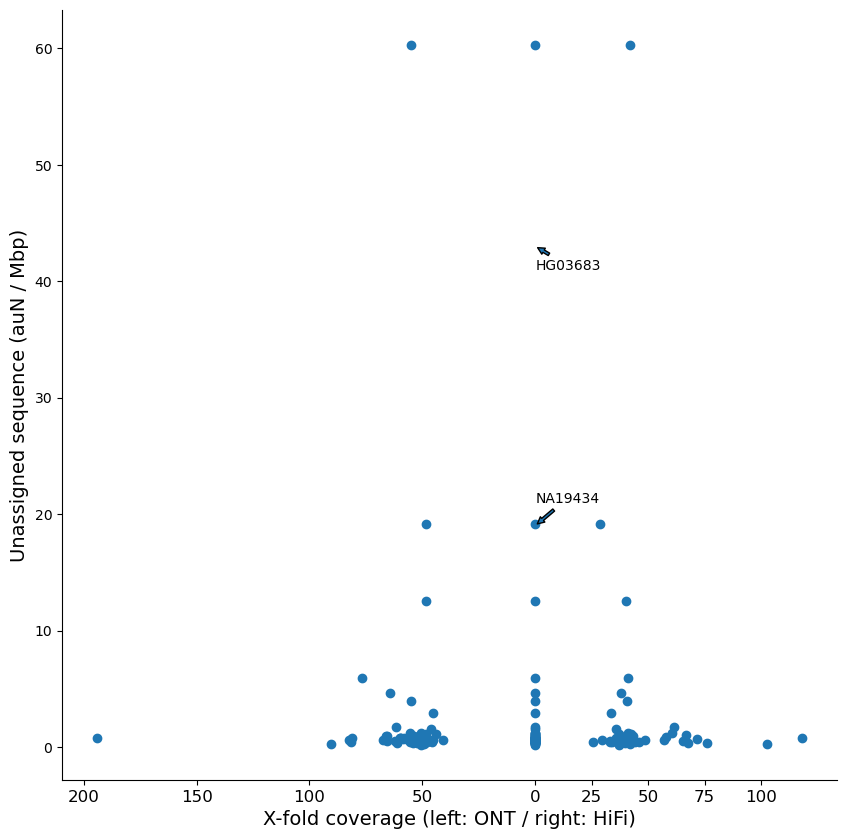

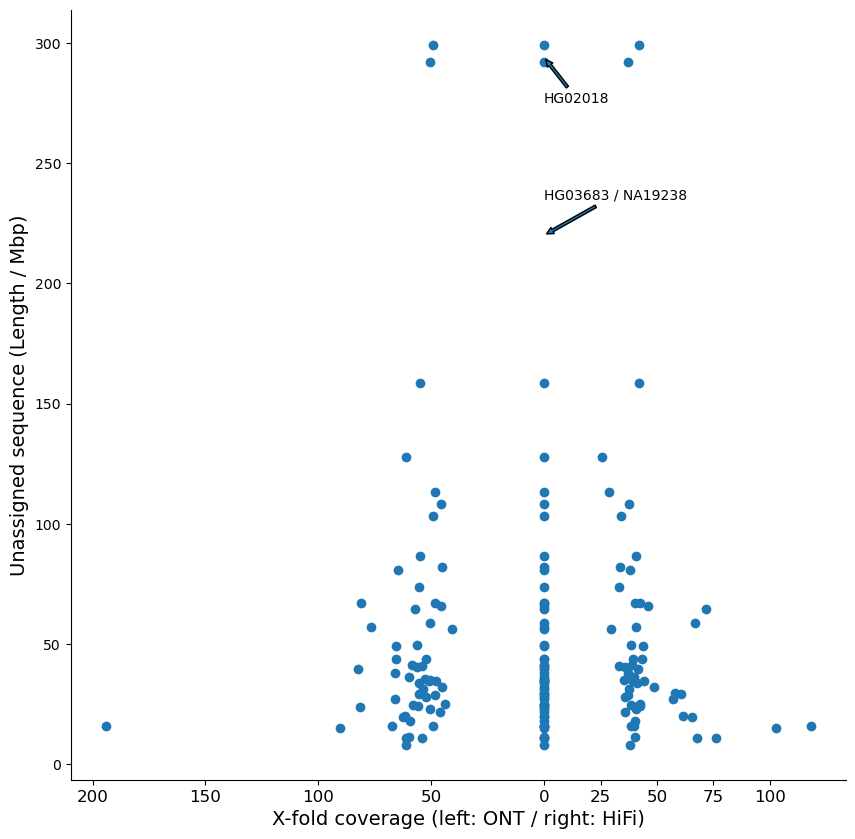

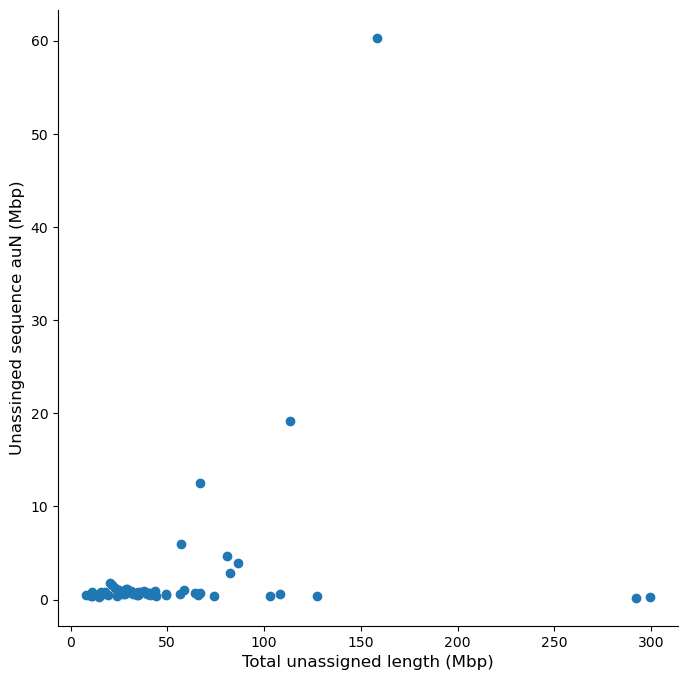

In [15]:
%run "../../../00_project_config.ipynb"

import pathlib as pl
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

cons_verkko_tables = PROJECT_DATA_ROOT.joinpath(
    "2023_assm_stats/verkko/eval_stage/summaries"
).resolve(strict=True)

all_stats = []
for tsv in cons_verkko_tables.glob("*.tsv"):
    sample = tsv.name.rsplit(".", 4)[0]
    try:
        asm_unit = tsv.name.rsplit(".", 3)[1].split("-", 1)[1]
    except IndexError:
        assert "contaminants" in tsv.name
        asm_unit = "contaminants"
        continue
    sample_sex = HGSVC_SAMPLES.loc[HGSVC_SAMPLES["sample"] == sample, "sex"].values
    assert len(sample_sex) == 1
    sample_sex = sample_sex[0]
    sample_batch = HGSVC_SAMPLES.loc[HGSVC_SAMPLES["sample"] == sample, "sex"].values
    df = pd.read_csv(tsv, sep="\t", comment="#", header=0)
    df["sample"] = sample
    df["asm_unit"] = asm_unit
    df["sex"] = sample_sex
    all_stats.append(df)
    
all_stats = pd.concat(all_stats, axis=0, ignore_index=False)
all_stats.reset_index(drop=True, inplace=True)

hap1 = all_stats["asm_unit"] == "hap1"
assert hap1.sum() > 0
hap2 = all_stats["asm_unit"] == "hap2"
assert hap2.sum() > 0
male = all_stats["sex"] == "male"
female = all_stats["sex"] == "female"

for label, stat in [("auN (Mbp)", "length_auN_grt_0bp"), ("LEN (Gbp)", "total_length_grt_0bp")]:

    statistic = all_stats["statistic"] == stat
    if "Mbp" in label:
        scale = 1e6
    if "Gbp" in label:
        scale = 1e9
    values_hap1m = all_stats.loc[statistic & hap1 & male, "value"] / scale
    low_hap1m = all_stats.loc[values_hap1m.idxmin(), "sample"]
    values_hap1f = all_stats.loc[statistic & hap1 & female, "value"] / scale
    low_hap1f = all_stats.loc[values_hap1f.idxmin(), "sample"]
    values_hap2m = all_stats.loc[statistic & hap2 & male, "value"] / scale
    low_hap2m = all_stats.loc[values_hap2m.idxmin(), "sample"]
    values_hap2f = all_stats.loc[statistic & hap2 & female, "value"] / scale
    low_hap2f = all_stats.loc[values_hap2f.idxmin(), "sample"]

#     fig, ax = plt.subplots(figsize=(8,8))
    
#     boxes = ax.boxplot(
#         [
#             values_hap1m, values_hap1f,
#             values_hap2m, values_hap2f
#         ],
#         positions=[1,2, 4,5],
#         showfliers=True,
#     )
#     ax.spines["top"].set_visible(False)
#     ax.spines["right"].set_visible(False)
#     ax.set_xticklabels(
#         [
#             f"H1/m\n({low_hap1m})",
#             f"H1/f\n({low_hap1f})",
#             f"H2/m\n({low_hap2m})",
#             f"H2/f\n({low_hap2f})",
#         ],
#         fontsize=14
#     )
#     ax.set_xlabel(label, fontsize=16)

rdna = all_stats["asm_unit"] == "rdna"
assert rdna.sum() > 0

for label, stat in [("auN (kbp)", "length_auN_grt_0bp"), ("LEN (Mbp)", "total_length_grt_0bp")]:

    statistic = all_stats["statistic"] == stat
    if "Mbp" in label:
        scale = 1e6
    if "Gbp" in label:
        scale = 1e9
    if "kbp" in label:
        scale = 1e3
    values_rdnam = all_stats.loc[statistic & rdna & male, "value"] / scale
    print(values_rdnam)
    low_rdnam = all_stats.loc[values_rdnam.idxmin(), "sample"]
    values_rdnaf = all_stats.loc[statistic & rdna & female, "value"] / scale
    low_rdnaf = all_stats.loc[values_rdnaf.idxmin(), "sample"]

#     fig, ax = plt.subplots(figsize=(8,8))
    
#     boxes = ax.boxplot(
#         [
#             values_rdnam, values_rdnaf,
#         ],
#         positions=[1,2],
#         showfliers=True,
#     )
#     ax.spines["top"].set_visible(False)
#     ax.spines["right"].set_visible(False)
#     ax.set_xticklabels(
#         [
#             f"rDNA/m\n({low_rdnam})",
#             f"rDNA/f\n({low_rdnaf})",
#         ],
#         fontsize=14
#     )
#     ax.set_xlabel(label, fontsize=16)

observed_cov = pd.concat(
    [
        pd.read_csv(
            PROJECT_DATA_ROOT.joinpath(
                "2023_batch_data_tables/hgsvc3_batch1_min_subset.tsv"
            ).resolve(strict=True),
            sep="\t", header=0, comment="#"
        ),
        pd.read_csv(
            PROJECT_DATA_ROOT.joinpath(
                "2023_batch_data_tables/hgsvc3_batch2_min_subset.tsv"
            ).resolve(strict=True),
            sep="\t", header=0, comment="#"
        ),
    ], axis=0, ignore_index=False
)
observed_cov = observed_cov.loc[observed_cov["statistic"] == "cov_xfold_grt_0bp_at_3Gbp", :].copy()

unassign_aun_x = []
unassign_aun_y = []

unassign_length_x = []
unassign_length_y = []

select_unassign = all_stats["asm_unit"] == "unassigned"
select_stats = all_stats["statistic"].isin(["total_length_grt_0bp", "length_auN_grt_0bp"])

select_hifi = observed_cov["read_type"] == "hifi"
select_ont = observed_cov["read_type"] == "ont"

outlier_aun = []

outlier_length = []

for row in all_stats.loc[select_unassign & select_stats, :].itertuples():
    select_sample = observed_cov["sample"] == row.sample
    assert select_sample.sum() > 0
    hifi_cov = observed_cov.loc[select_hifi & select_sample, "value"].values[0]
    ont_cov = observed_cov.loc[select_ont & select_sample, "value"].values[0]
    
    if "total" in row.statistic:
        unassign_length_x.append(0)
        unassign_length_y.append(row.value/1e6)
        
        unassign_length_x.append(hifi_cov)
        unassign_length_y.append(row.value/1e6)
        
        unassign_length_x.append(-1*ont_cov)
        unassign_length_y.append(row.value/1e6)
        
        if row.value/1e6 > 150:
            outlier_length.append((row.sample, row.value/1e6, hifi_cov, ont_cov))
        
    elif "auN" in row.statistic:
        unassign_aun_x.append(0)
        unassign_aun_y.append(row.value/1e6)
        
        unassign_aun_x.append(hifi_cov)
        unassign_aun_y.append(row.value/1e6)
        
        unassign_aun_x.append(-1*ont_cov)
        unassign_aun_y.append(row.value/1e6)
        
        if row.value/1e6 > 10:
            outlier_aun.append((row.sample, row.value/1e6, hifi_cov, ont_cov))
        
    else:
        raise

fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(
    unassign_aun_x,
    unassign_aun_y
)

xticks = [-200, -150, -100, -50, 0, 25, 50, 75, 100]
ax.set_xticks(xticks)
ax.set_xticklabels(list([str(abs(x)) for x in xticks]), fontsize=12)
ax.set_xlabel("X-fold coverage (left: ONT / right: HiFi)", fontsize=14)
ax.set_ylabel("Unassigned sequence (auN / Mbp)", fontsize=14)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# ax.annotate(
#     "NA19434",
#     (0, 19),
#     xytext=(0, 21),
#     arrowprops={"arrowstyle": "simple"}
# )
# ax.annotate(
#     "HG03683",
#     (0, 43),
#     xytext=(0, 41),
#     arrowprops={"arrowstyle": "simple"}
# )


fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(
    unassign_length_x,
    unassign_length_y
)

xticks = [-200, -150, -100, -50, 0, 25, 50, 75, 100]
ax.set_xticks(xticks)
ax.set_xticklabels(list([str(abs(x)) for x in xticks]), fontsize=12)
ax.set_xlabel("X-fold coverage (left: ONT / right: HiFi)", fontsize=14)
ax.set_ylabel("Unassigned sequence (Length / Mbp)", fontsize=14)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# ax.annotate(
#     "HG03683 / NA19238",
#     (0, 220),
#     xytext=(0, 235),
#     arrowprops={"arrowstyle": "simple"}
# )
# ax.annotate(
#     "HG02018",
#     (0, 294),
#     xytext=(0, 275),
#     arrowprops={"arrowstyle": "simple"}
# )

# ax.annotate(
#     "HG01573",
#     (0, 356),
#     xytext=(0, 335),
#     arrowprops={"arrowstyle": "simple"}
# )

select_length = all_stats["statistic"] == "total_length_grt_0bp"
select_aun = all_stats["statistic"] == "length_auN_grt_0bp"

fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(
    all_stats.loc[select_length & select_unassign, "value"].values/1e6,
    all_stats.loc[select_aun & select_unassign, "value"].values/1e6,
    
)
ax.set_xlabel("Total unassigned length (Mbp)", fontsize=12)
ax.set_ylabel("Unassinged sequence auN (Mbp)", fontsize=12)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)